## Setup Drive and Data Folder LSTM 16 Features TimeSeries!

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import os
import numpy as np
RNDSEED = np.random.seed(39)
PRECISION = 4 # 3 of digits to keep after the decimal point
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
RUNNING_ON_COLAB = False # we assume running on CoLab! Change to False if running locally.

In [4]:
## mount gdrive
#from google.colab import drive#
#drive.mount("/content/gdrive")

In [5]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.
data_path = path + '/fl_testbed/version2/data/initial'
print(data_path)
#/home/jose/FL_AM_Defect-Detection
#/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


## Play code

<font color=cyan>The key is to transform the time column! </font>


In [6]:
!cd '/home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial' && ls

/bin/bash: line 0: cd: /home/jose/FL_AM_Defect-Detection/notebooks/fl_testbed/version2/data/initial: No such file or directory


In [7]:
## start - play code
print(data_path)
csv_file = data_path + '/grouped.combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


In [8]:
print(df.columns)

Index(['Unnamed: 0', 'wf_start_time', 'S1_CrestFactor_g~g', 'S1_DerivedPeak_g',
       'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g', 'S1_HighFrequency_grms',
       'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g', 'S2_DerivedPeak_g',
       'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g', 'S2_HighFrequency_grms',
       'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')


In [9]:
df.head(5)


,Unnamed: 0,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,0,2022-08-30 19:17:41.000007,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,3.1791,0.4064,1.7640,0.2874,0.9136,0.2825,2.6123,72.5867,6.25mm_Offset,176049.0
1,1,2022-08-30 19:17:42.000007,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,3.1860,0.4075,1.7210,0.2882,0.9180,0.2853,2.5937,72.5893,6.25mm_Offset,176048.0
2,2,2022-08-30 19:17:43.000007,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,3.0295,0.4087,1.6775,0.2890,0.8755,0.2840,2.5947,72.5610,6.25mm_Offset,176047.0
3,3,2022-08-30 19:17:44.000007,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,3.1823,0.4082,1.7048,0.2886,0.9185,0.2841,2.5852,72.5600,6.25mm_Offset,176046.0
4,4,2022-08-30 19:17:45.000007,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,3.1616,0.4062,1.7570,0.2873,0.9082,0.2830,2.6230,72.5711,6.25mm_Offset,176045.0


In [10]:

#238722
#DO NOT FORGET SORT VALUES
df1=df.loc[0:238721].sort_values(by='wf_start_time').reset_index()
df2=df.loc[0+238722:0+238722+238722-1].sort_values(by='wf_start_time').reset_index()
df3=df.loc[0+238722+238722:].sort_values(by='wf_start_time').reset_index()


In [11]:

lists=[]
for df in [df1,df2,df3]:
    # Let's find the youngest & oldest timestamp

    df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

    youngest = min(df.wf_start_time)
    oldest = max(df.wf_start_time)
    print(youngest)
    print(oldest)
    span = oldest - youngest
    print(span)
    print(span.total_seconds())

    ## Using Oldest - current to determine the RUL
    df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())
    lists.append(df)


df=pd.concat(lists[:],ignore_index=True)




2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0
2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0
2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


In [12]:

# drop Unnamed columns
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]


In [13]:


df.loc[0:238721]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
0,114113,2022-08-09 14:03:22.000007,6.3262,0.2043,1.7667,0.1444,0.9138,0.0143,9.6233,19.5260,0.4308,10.9733,0.3046,5.9486,0.1085,88.3183,72.2894,No_Offset,2009308.0
1,114114,2022-08-09 14:03:23.000007,4.9617,0.1564,1.0839,0.1106,0.5488,0.0638,4.9085,4.5581,2.1747,13.7421,1.5378,7.0093,1.1242,4.7455,72.2237,No_Offset,2009307.0
2,114115,2022-08-09 14:03:24.000007,4.1013,0.1775,1.0100,0.1255,0.5146,0.1057,4.1414,3.7978,2.3015,12.2520,1.6274,6.1806,1.3463,4.8955,72.2537,No_Offset,2009306.0
3,114116,2022-08-09 14:03:25.000007,3.0655,0.1553,0.6562,0.1098,0.3367,0.0282,2.5749,3.1216,0.3571,1.5621,0.2525,0.7883,0.2509,2.4593,72.2154,No_Offset,2009305.0
4,114117,2022-08-09 14:03:26.000007,3.1382,0.1445,0.6266,0.1022,0.3207,0.0314,2.5866,3.0675,0.3904,1.6282,0.2761,0.8469,0.2744,2.4056,72.2824,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,165635,2022-09-01 20:11:29.000007,2.7161,0.2191,0.8321,0.1550,0.4209,0.0429,2.2617,2.6572,0.4871,1.7753,0.3444,0.9153,0.3403,2.2324,73.6450,12.7mm_Offset,21.0
238718,165636,2022-09-01 20:11:30.000007,2.7855,0.1945,0.7419,0.1375,0.3831,0.0434,2.3828,2.9189,0.4891,1.8600,0.3459,1.0095,0.3414,2.2193,73.6355,12.7mm_Offset,20.0
238719,165637,2022-09-01 20:11:31.000007,4.3463,0.1253,0.7304,0.0886,0.3852,0.0095,4.7102,6.7770,0.1966,1.7999,0.1390,0.9420,0.0289,12.4756,73.6480,12.7mm_Offset,19.0
238720,165638,2022-09-01 20:11:32.000007,3.7675,0.0594,0.2906,0.0420,0.1583,0.0047,2.9428,3.9179,0.0447,0.2476,0.0316,0.1239,0.0120,3.1032,73.6708,12.7mm_Offset,18.0


In [14]:


df.loc[0+238722:0+238722+238722-1]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
238722,352835,2022-08-09 14:03:22.000007,11.3774,0.0774,1.2448,0.0548,0.6230,0.0077,31.1542,7.4837,0.4835,5.0076,0.3419,2.5585,0.0822,14.5915,72.6925,No_Offset,2009308.0
238723,352836,2022-08-09 14:03:23.000007,3.8807,0.1125,0.5936,0.0795,0.3087,0.0307,3.1756,3.9882,1.3528,7.5184,0.9566,3.8151,0.8768,4.0394,72.6770,No_Offset,2009307.0
238724,352837,2022-08-09 14:03:24.000007,4.4433,0.1114,0.6976,0.0788,0.3501,0.0667,5.5181,4.3108,1.5954,9.6066,1.1281,4.8633,0.9626,5.9209,72.7182,No_Offset,2009306.0
238725,352838,2022-08-09 14:03:25.000007,3.6639,0.0316,0.1558,0.0224,0.0819,0.0131,2.9742,3.3669,0.3965,1.8636,0.2804,0.9439,0.2802,2.8906,72.6560,No_Offset,2009305.0
238726,352839,2022-08-09 14:03:26.000007,3.8587,0.0319,0.1672,0.0225,0.0869,0.0159,2.9832,3.0756,0.4225,1.8211,0.2988,0.9189,0.2956,2.8701,72.7230,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477439,404357,2022-09-01 20:11:29.000007,5.0527,0.0309,0.1838,0.0218,0.1103,0.0098,3.8254,3.0655,0.4314,1.8350,0.3050,0.9351,0.3024,2.6377,73.6655,12.7mm_Offset,21.0
477440,404358,2022-09-01 20:11:30.000007,4.6980,0.0302,0.1855,0.0213,0.1003,0.0098,3.6496,2.9708,0.4346,1.7995,0.3073,0.9130,0.3033,2.6393,73.6857,12.7mm_Offset,20.0
477441,404359,2022-09-01 20:11:31.000007,5.7418,0.0311,0.2163,0.0220,0.1264,0.0074,3.4317,7.1637,0.1693,1.6988,0.1197,0.8578,0.0299,13.7829,73.6676,12.7mm_Offset,19.0
477442,404360,2022-09-01 20:11:32.000007,3.7025,0.0264,0.1335,0.0186,0.0690,0.0035,2.8471,3.7872,0.0576,0.3029,0.0408,0.1543,0.0165,3.1129,73.6929,12.7mm_Offset,18.0


In [15]:

df.loc[0+238722+238722:]


,index,wf_start_time,S1_CrestFactor_g~g,S1_DerivedPeak_g,S1_Peak~Peak_g,S1_RMS_g,S1_TruePeak_g,S1_HighFrequency_grms,S1_Kurtosis_g~g,S2_CrestFactor_g~g,S2_DerivedPeak_g,S2_Peak~Peak_g,S2_RMS_g,S2_TruePeak_g,S2_HighFrequency_grms,S2_Kurtosis_g~g,S1_temp,status,rul
477444,591557,2022-08-09 14:03:22.000007,12.3214,0.5170,8.3688,0.3655,4.5040,0.1355,29.4402,11.3516,0.8401,12.4549,0.5941,6.7436,0.1040,37.6491,72.4676,No_Offset,2009308.0
477445,591558,2022-08-09 14:03:23.000007,5.5933,2.5483,20.0644,1.8019,10.0786,1.9368,8.9174,5.6735,1.8216,13.1957,1.2881,7.3079,0.2197,5.0971,72.4427,No_Offset,2009307.0
477446,591559,2022-08-09 14:03:24.000007,4.0140,2.5484,14.3660,1.8020,7.2333,1.6188,5.0306,7.7328,1.2040,11.7569,0.8513,6.5833,0.3566,12.4059,72.4770,No_Offset,2009306.0
477447,591560,2022-08-09 14:03:25.000007,2.6487,0.6943,2.5795,0.4910,1.3004,0.4809,2.2368,3.7461,0.2835,1.4845,0.2004,0.7508,0.1578,2.8937,72.4549,No_Offset,2009305.0
477448,591561,2022-08-09 14:03:26.000007,2.5022,0.6752,2.3616,0.4774,1.1946,0.4748,2.2111,3.7041,0.2932,1.4761,0.2073,0.7679,0.1620,2.7997,72.4988,No_Offset,2009304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716161,643079,2022-09-01 20:11:29.000007,2.5083,0.6880,2.3624,0.4865,1.2203,0.4834,2.1624,3.5082,0.2728,1.2713,0.1929,0.6767,0.1447,2.7364,73.5386,12.7mm_Offset,21.0
716162,643080,2022-09-01 20:11:30.000007,2.3925,0.6879,2.2706,0.4864,1.1638,0.4837,2.1555,3.2138,0.2856,1.2836,0.2020,0.6491,0.1457,2.7667,73.5767,12.7mm_Offset,20.0
716163,643081,2022-09-01 20:11:31.000007,5.7067,0.2556,2.0422,0.1808,1.0315,0.0308,13.5090,5.3715,0.1918,1.3841,0.1356,0.7285,0.0184,3.9787,73.5347,12.7mm_Offset,19.0
716164,643082,2022-09-01 20:11:32.000007,4.2261,0.0406,0.2402,0.0287,0.1215,0.0115,3.1910,4.3151,0.1361,0.7445,0.0963,0.4154,0.0036,3.2765,73.5728,12.7mm_Offset,18.0


In [16]:



df.columns

Index(['index', 'wf_start_time', 'S1_CrestFactor_g~g', 'S1_DerivedPeak_g',
       'S1_Peak~Peak_g', 'S1_RMS_g', 'S1_TruePeak_g', 'S1_HighFrequency_grms',
       'S1_Kurtosis_g~g', 'S2_CrestFactor_g~g', 'S2_DerivedPeak_g',
       'S2_Peak~Peak_g', 'S2_RMS_g', 'S2_TruePeak_g', 'S2_HighFrequency_grms',
       'S2_Kurtosis_g~g', 'S1_temp', 'status', 'rul'],
      dtype='object')

In [17]:
## RF Regression

## Common imports
import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

### Exploring the data a bit & prep the df

# ## future, let's read the file
# csv_file = data_path + '/combined_offset_misalignment_with_RUL.csv'
# df_temp = pd.read_csv(csv_file, chunksize=50000) 
# big_df = pd.concat(df_temp)

#df = big_df # reset 


In [18]:

# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column
df = df[df.columns.drop(list(df.filter(regex='index')))] # drop status column




In [19]:

df.shape



(716166, 16)

In [20]:
df.columns

Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp',
       'rul'],
      dtype='object')

In [21]:
### RF works

# Get X & y
# Naming convention: X as predictors; y as response.
from sklearn.model_selection import train_test_split


In [22]:

y = df['rul'] # pop response
X = df.drop('rul',axis = 1) # drop response


In [23]:

print (X.shape)
print (X.columns)

(716166, 15)
Index(['S1_CrestFactor_g~g', 'S1_DerivedPeak_g', 'S1_Peak~Peak_g', 'S1_RMS_g',
       'S1_TruePeak_g', 'S1_HighFrequency_grms', 'S1_Kurtosis_g~g',
       'S2_CrestFactor_g~g', 'S2_DerivedPeak_g', 'S2_Peak~Peak_g', 'S2_RMS_g',
       'S2_TruePeak_g', 'S2_HighFrequency_grms', 'S2_Kurtosis_g~g', 'S1_temp'],
      dtype='object')


# New Split!

In [24]:
## true orignal ones
# data split
X_train, X_residual, y_train, y_residual = train_test_split(X, y,test_size=0.20,shuffle=False)



In [25]:
print(X_train.shape, y_train.shape)

(572932, 15) (572932,)


In [26]:
#VALIDATION:

X_vals, X_test, y_vals, y_test = train_test_split(X_residual, y_residual,shuffle=False,test_size=0.5)


In [27]:
print(X_vals.shape, y_vals.shape)
print(X_test.shape, y_test.shape)

(71617, 15) (71617,)
(71617, 15) (71617,)


In [28]:
#PARAMETERS
SEQUENCE_LENGHT=10
STEPS_PER_BATCH=4

n_features=15

In [29]:
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator

2023-05-30 11:44:03.198412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 11:44:04.055156: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [30]:
#TRAINING!

out_seq = np.array(y_train)#out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
dataset = np.array(X_train)#hstack((in_seq1, in_seq2))

pd.DataFrame(dataset)



# shift the target sample by one step
out_seq = np.insert(out_seq, 0, 0)
#pre

out_seq = np.delete(out_seq, -1)
# define generator
n_input = SEQUENCE_LENGHT #leght of the sequence timesteps

training_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# print each sample
# for i in range(len(validation_generator)):
#     x, y = generator[i]
#     print('%s => %s' % (x, y))




In [31]:

out_seq = np.array(y_vals)#out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
scaler = StandardScaler()
X_vals=scaler.fit_transform(X_vals)
dataset = np.array(X_vals)#hstack((in_seq1, in_seq2))

pd.DataFrame(dataset)





,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.013343,0.103281,0.132864,0.101358,0.072865,0.070954,0.010147,-0.974456,-1.829681,-1.576897,-1.825698,-1.642053,-1.357101,-0.160286,1.065847
1,0.163579,0.165362,0.130824,0.166049,0.311776,0.178914,0.006849,0.141083,-1.051929,-0.310731,-1.050366,-0.503844,-1.205916,-0.058027,1.031978
2,0.346188,0.162094,0.165517,0.161428,0.513034,0.192409,0.012209,-0.147403,-1.593805,-1.374662,-1.591296,-0.998376,-1.239513,-0.252938,0.892268
3,1.491127,0.149025,1.168895,0.147566,1.777708,0.124934,0.008746,1.328431,-1.102929,-0.016905,-1.104459,0.240571,-1.256311,-0.029694,0.953656
4,0.756900,0.155559,0.324697,0.152187,0.966187,0.151924,0.002397,-1.006302,-1.045554,-1.203935,-1.041351,-1.252183,-1.205916,-0.155075,1.051992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71612,1.054508,-2.046668,-0.328349,-2.047321,-0.303681,-1.971283,0.055248,-1.234530,0.580075,-0.844895,0.581437,-0.577108,-0.282004,-0.314326,1.018123
71613,1.007750,-2.030331,-0.086178,-2.028838,-0.340037,-1.912805,0.055413,-0.621655,0.796826,0.112790,0.797809,-0.009312,-0.265206,0.053025,0.957120
71614,0.744895,-1.997657,-0.420184,-1.996492,-0.582844,-1.899310,0.056732,-0.812730,0.529075,-0.174443,0.527344,-0.295826,-0.265206,-0.013737,0.822414
71615,0.446655,-1.837554,-0.490250,-1.834764,-0.773714,-1.786852,0.056650,-0.054051,0.025449,0.085678,0.022477,-0.023703,-0.013230,-0.159798,0.787582


In [32]:

# shift the target sample by one step
out_seq = np.insert(out_seq, 0, 0)
#pre

out_seq = np.delete(out_seq, -1)
# define generator
n_input = SEQUENCE_LENGHT #leght of the sequence timesteps

validation_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# print each sample
# for i in range(len(validation_generator)):
#     x, y = generator[i]
#     print('%s => %s' % (x, y))



In [33]:


out_seq = np.array(y_test)#out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
scaler = StandardScaler()
X_test=scaler.fit_transform(X_test)
dataset = np.array(X_test)#hstack((in_seq1, in_seq2))

pd.DataFrame(dataset)




# shift the target sample by one step
out_seq = np.insert(out_seq, 0, 0)
#pre

out_seq = np.delete(out_seq, -1)
# define generator
n_input = SEQUENCE_LENGHT #leght of the sequence timesteps
testing_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)
# print each sample
# for i in range(len(testing_generator)):
#     x, y = generator[i]
#     print('%s => %s' % (x, y))



In [34]:
for i in range(len(testing_generator)):
    x, y = testing_generator[i]
    print(x.shape, y.shape)

(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4

(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4,)
(4, 10, 15) (4

In [35]:

print(len(testing_generator[0][0][0][0]))
print(testing_generator[0][0][0][0])
print(len(testing_generator[0][0][0]))
print(testing_generator[0][0][0])
print(len(testing_generator[0][0]))
print(testing_generator[0][0])
print(len(testing_generator[0]))
print(testing_generator[0])



15
[ 1.38830344 -0.56371337  0.45650871 -0.56358037  0.32896014 -0.59507461
  0.77453324  0.92933783 -0.90345341 -0.35480447 -0.90494126 -0.19717876
 -1.01283434  0.57156783  0.77473629]
10
[[ 1.38830344e+00 -5.63713368e-01  4.56508709e-01 -5.63580371e-01
   3.28960135e-01 -5.95074611e-01  7.74533242e-01  9.29337834e-01
  -9.03453408e-01 -3.54804471e-01 -9.04941262e-01 -1.97178764e-01
  -1.01283434e+00  5.71567828e-01  7.74736292e-01]
 [ 1.23706434e+00 -5.78035107e-01  2.99306941e-01 -5.77082957e-01
   2.41440451e-01 -5.53924660e-01  8.24321046e-01 -8.14195374e-01
  -4.97784754e-01 -9.43518537e-01 -4.96626586e-01 -8.74532479e-01
  -1.00800385e+00 -1.44794174e-01  8.31828906e-01]
 [ 1.52017656e+00 -6.06678584e-01  3.23975526e-01 -6.07463774e-01
   3.66468571e-01 -5.77928798e-01  8.00509488e-01  1.70608438e-01
  -7.97467904e-01 -4.82839060e-01 -7.96401918e-01 -5.38654604e-01
  -1.05630876e+00  6.61724607e-01  7.35254335e-01]
 [ 1.42611321e+00 -5.80422063e-01  1.88540157e-01 -5.80458603e-

# LSTM

In [42]:
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from datetime import datetime
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation, LSTM
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.regression import AutoSklearnRegressor
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


In [43]:
#FOR NOW DO NOT DELETE AS THERE IS ONE MODEL RUNNIG!

#!mkdir logs/fit/
# !rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp


In [44]:



log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
def scheduler(epoch, lr):
      if epoch < 200:
        lr=0.0001
        return lr
      else:
        lr=0.0001
        return lr #* tf.math.exp(-0.1)
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

es=EarlyStopping(
    monitor="val_loss",

    patience=3,
    verbose=1,
    mode="auto",
    min_delta=0.001
)

# # checkpoint_filepath = "./tmp/checkpoint"

#scaler = MinMaxScaler()



%load_ext tensorboard
%reload_ext tensorboard





The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [45]:
#MODEL!!

In [1]:




#TRAINING
tf.keras.backend.clear_session()

#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)


# define generator
 


# model1.add(Dense(80), input_shape=(X_train.shape[1],), activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))


# self.model
model = Sequential()

model.add(LSTM(64, input_shape = (n_input, n_features), return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))


# model.add(Dense(120, activation="relu", input_dim=X.shape[1]))


# # model.add(Dropout(0.2))


# model.add(Dense(120, activation="relu"))
# # model.add(Dropout(0.2))

model.add(Dense(40, activation="relu"))
# output layer
model.add(Dense(1, activation="linear")
            )  # softmax for probability, #values are sigmoid


# Compile the network :
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# NN_model.summary()

# Configure the model and start training
model.compile(loss='huber', optimizer='adam', metrics=['mae'])

#FAST AI SEE IF TRIANING IMPROVES !




NameError: name 'tf' is not defined

In [52]:
history=model.fit_generator(training_generator,steps_per_epoch=1,validation_data=validation_generator, epochs=500 ,verbose=1,callbacks=[tensorboard_callback,lr],)


Epoch 1/500


/tmp/ipykernel_42032/3681422334.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(training_generator,steps_per_epoch=1,validation_data=validation_generator, epochs=500 ,verbose=1,callbacks=[tensorboard_callback,lr],)
2023-05-29 20:38:16.487982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-29 20:38:16.669558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	

1/1 [==============================] - ETA: 0s - loss: 1316017.0000 - mae: 1316017.5000

2023-05-29 20:38:19.611850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-29 20:38:19.795174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-29 20:38:19.796395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_gra

1/1 [==============================] - 37s 37s/step - loss: 1316017.0000 - mae: 1316017.5000 - val_loss: 1334766.5000 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 2/500
1/1 [==============================] - 33s 33s/step - loss: 1316095.0000 - mae: 1316095.5000 - val_loss: 1334766.5000 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 3/500
1/1 [==============================] - 33s 33s/step - loss: 869316.0000 - mae: 869316.5000 - val_loss: 1334766.5000 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 4/500
1/1 [==============================] - 33s 33s/step - loss: 2001032.0000 - mae: 2001032.5000 - val_loss: 1334766.5000 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 5/500
1/1 [==============================] - 33s 33s/step - loss: 12263.0479 - mae: 12263.5479 - val_loss: 1334766.5000 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 6/500
1/1 [==============================] - 32s 32s/step - loss: 1897887.0000 - mae: 1897887.5000 - val_loss: 1334766.5000 - val_mae: 1334766.6250 - lr: 1.0

Epoch 49/500
1/1 [==============================] - 32s 32s/step - loss: 1482581.7500 - mae: 1482582.2500 - val_loss: 1334766.2500 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 50/500
1/1 [==============================] - 32s 32s/step - loss: 1894435.8750 - mae: 1894436.3750 - val_loss: 1334766.2500 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 51/500
1/1 [==============================] - 31s 31s/step - loss: 20186.9180 - mae: 20187.4180 - val_loss: 1334766.2500 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 52/500
1/1 [==============================] - 32s 32s/step - loss: 1473638.8750 - mae: 1473639.3750 - val_loss: 1334766.2500 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 53/500
1/1 [==============================] - 31s 31s/step - loss: 1472704.8750 - mae: 1472705.3750 - val_loss: 1334766.2500 - val_mae: 1334766.6250 - lr: 1.0000e-04
Epoch 54/500
1/1 [==============================] - 31s 31s/step - loss: 1736775.8750 - mae: 1736776.2500 - val_loss: 1334766.2500 - val_mae: 13

KeyboardInterrupt: 

In [ ]:
model.save(path+'MLP_REG_RUL_16LSTM',save_format='h5')



In [ ]:
# loading the saved model
loaded_model = tf.keras.models.load_model(path+'MLP_REG_RUL_16LSTM')



In [ ]:

scaler=StandardScaler()
X_test=scaler.fit_transform(X_test)



y_pred = loaded_model.predict(X_test) ## using the untinted dataset!
    
print('R^2:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Max Error:', metrics.max_error(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313



In [4]:
# If running locally, define current working path
path = os.getcwd()

# If Google colab
if RUNNING_ON_COLAB:
    path = "/content/gdrive/My Drive/Colab Notebooks/RandomForest_FeatureData"

print(path)

# define current data path. This is after we did classification. We have done some
# cleaning already.
data_path = path + '/fl_testbed/version2/data/initial'
print(data_path)

/home/jose/FL_AM_Defect-Detection
/home/jose/FL_AM_Defect-Detection/fl_testbed/version2/data/initial


## Util - add RUL column

In [5]:
csv_file = data_path + '/combined_offset_misalignment.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
df = pd.concat(df_temp, ignore_index=True)

# Method Original

In [6]:
# Let's find the youngest & oldest timestamp

df['wf_start_time'] = pd.to_datetime(df['wf_start_time']) # make sure it is datetime

youngest = min(df.wf_start_time)
oldest = max(df.wf_start_time)
print(youngest)
print(oldest)
span = oldest - youngest
print(span)
print(span.total_seconds())

## Using Oldest - current to determine the RUL
df['rul'] = df['wf_start_time'].apply(lambda x: (oldest - x).total_seconds())

2022-08-09 14:03:22.000007
2022-09-01 20:11:50.000007
23 days 06:08:28
2009308.0


# DONE

In [7]:
print(path)

/home/jose/FL_AM_Defect-Detection


In [8]:
# save back with RUL
df.to_csv(data_path + '/combined_offset_misalignment_with_RUL.csv')


In [9]:
!pwd && cd "fl_testbed/version2/data/initial"  && ls 

/home/jose/FL_AM_Defect-Detection
combined_offset_misalignment.csv	   random_forest_offset_RUL.joblib
combined_offset_misalignment_with_RUL.csv  select_features.py
grouped.combined_offset_misalignment.csv


## LSTM Regression

In [10]:
## Common imports
colab = False

import pandas as pd
import numpy as np
import csv
import os

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score, cohen_kappa_score

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error
# from pandas_ml import ConfusionMatrix

import matplotlib
import matplotlib.pyplot as plt
plt.style.available
%matplotlib inline

# to make this notebook's output stable across runs
RNDSEED = np.random.seed(39)

2023-05-28 10:49:20.993073: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 10:49:21.676019: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Exploring the data a bit & prep the df

In [11]:
## future, let's read the file
if colab == False:
    csv_file = data_path+"/combined_offset_misalignment_with_RUL.csv"
else:
    csv_file = path + '/results/combined_offset_misalignment_with_RUL.csv'
df_temp = pd.read_csv(csv_file, chunksize=50000) 
big_df = pd.concat(df_temp)

In [12]:
big_df.status.unique()

array(['6.25mm_Offset', '3mm_Offset', 'No_Offset', '12.7mm_Offset',
       '1mm_Offset'], dtype=object)

In [13]:
print(big_df.status.value_counts())
for i in big_df['status'].unique():
    print(big_df[big_df['status']==i]['rul'].max(),big_df[big_df['status']==i]['rul'].min())

No_Offset        79205
1mm_Offset       73082
3mm_Offset       36248
6.25mm_Offset    29588
12.7mm_Offset    20599
Name: status, dtype: int64
880436.0 84581.0
1231190.0 1119518.0
2009308.0 1727235.0
20701.0 0.0
1490933.0 1291719.0


In [14]:
# df = big_df # reset 


#ONL:Y ONE SCENARIO

#big_df['status']=='1mm_Offset' BIG ERRROR NOT PERFORMING GOOD!
#big_df['status']=='12.7mm_Offset' LOW ERROR 
df=big_df#[big_df['status']=='1mm_Offset']#'12.7mm_Offset'12.7mm_Offset 1mm_Offset  6.25mm_Offset


# drop unwanted cols
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))] # drop Unnamed
df = df[df.columns.drop(list(df.filter(regex='wf_start_time')))] # drop time column
#df = df[df.columns.drop(list(df.filter(regex='status')))] # drop status column




In [15]:
df.shape

(238722, 48)

In [16]:
df.columns

Index(['Probe_1_AxialDirection_CrestFactor_g~g',
       'Probe_1_AxialDirection_DerivedPeak_g',
       'Probe_1_AxialDirection_Peak~Peak_g', 'Probe_1_AxialDirection_RMS_g',
       'Probe_1_AxialDirection_TruePeak_g',
       'Probe_1_AxialDirection_HighFrequency_grms',
       'Probe_1_AxialDirection_Kurtosis_g~g',
       'Probe_2_RadialVertical_CrestFactor_g~g',
       'Probe_2_RadialVertical_DerivedPeak_g',
       'Probe_2_RadialVertical_Peak~Peak_g', 'Probe_2_RadialVertical_RMS_g',
       'Probe_2_RadialVertical_TruePeak_g',
       'Probe_2_RadialVertical_HighFrequency_grms',
       'Probe_2_RadialVertical_Kurtosis_g~g',
       'Probe_3_RadialHorizontal_CrestFactor_g~g',
       'Probe_3_RadialHorizontal_DerivedPeak_g',
       'Probe_3_RadialHorizontal_Peak~Peak_g',
       'Probe_3_RadialHorizontal_RMS_g', 'Probe_3_RadialHorizontal_TruePeak_g',
       'Probe_3_RadialHorizontal_HighFrequency_grms',
       'Probe_3_RadialHorizontal_Kurtosis_g~g',
       'Probe_4_RadialVertical_CrestFacto

In [17]:
df

,Probe_1_AxialDirection_CrestFactor_g~g,Probe_1_AxialDirection_DerivedPeak_g,Probe_1_AxialDirection_Peak~Peak_g,Probe_1_AxialDirection_RMS_g,Probe_1_AxialDirection_TruePeak_g,Probe_1_AxialDirection_HighFrequency_grms,Probe_1_AxialDirection_Kurtosis_g~g,Probe_2_RadialVertical_CrestFactor_g~g,Probe_2_RadialVertical_DerivedPeak_g,Probe_2_RadialVertical_Peak~Peak_g,...,Probe_6_BearingRadial_RMS_g,Probe_6_BearingRadial_TruePeak_g,Probe_6_BearingRadial_HighFrequency_grms,Probe_6_BearingRadial_Kurtosis_g~g,Thermocouple 1_Value,Thermocouple 2_Value,Thermocouple 3_Value,Thermocouple 4_Value,status,rul
0,2.9679,0.1485,0.6232,0.1050,0.3116,0.0303,2.3544,3.0998,0.4020,1.7522,...,0.0166,0.0687,0.0074,3.1289,72.5799,72.4725,72.5867,73.0246,6.25mm_Offset,176049.0
1,3.0104,0.1511,0.6261,0.1069,0.3217,0.0310,2.3787,3.0161,0.4009,1.6983,...,0.0162,0.0618,0.0076,2.9855,72.5552,72.4137,72.5893,73.0349,6.25mm_Offset,176048.0
2,3.2165,0.1611,0.6889,0.1139,0.3664,0.0309,2.3040,3.2447,0.4001,1.7788,...,0.0160,0.0595,0.0074,3.2605,72.5661,72.4391,72.5610,73.0723,6.25mm_Offset,176047.0
3,3.1404,0.1388,0.6156,0.0981,0.3081,0.0309,2.4416,3.1142,0.4004,1.7542,...,0.0163,0.0867,0.0075,3.7580,72.5788,72.4654,72.5600,73.0508,6.25mm_Offset,176046.0
4,3.4300,0.1520,0.6706,0.1075,0.3686,0.0302,2.3783,3.1580,0.4001,1.7532,...,0.0160,0.0680,0.0074,3.1019,72.5864,72.4441,72.5711,73.0678,6.25mm_Offset,176045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238717,3.2750,0.1771,0.7867,0.1252,0.4102,0.0499,2.4770,3.2238,0.3979,1.8137,...,0.0129,0.0545,0.0044,3.1400,73.5705,73.2741,73.3993,73.7809,1mm_Offset,1464954.0
238718,3.0359,0.1750,0.7433,0.1237,0.3756,0.0490,2.3456,3.0837,0.3984,1.7275,...,0.0132,0.0555,0.0045,3.1751,73.6015,73.3187,73.4508,73.7080,1mm_Offset,1464953.0
238719,2.8791,0.1622,0.6565,0.1147,0.3302,0.0495,2.4121,3.2785,0.3998,1.8481,...,0.0126,0.0490,0.0044,3.0785,73.6119,73.2891,73.4424,73.7252,1mm_Offset,1464952.0
238720,3.8311,0.1496,0.7588,0.1058,0.4053,0.0258,3.0219,5.0555,0.2655,1.8198,...,0.0122,0.0558,0.0030,3.3732,73.6241,73.3149,73.4350,73.7799,1mm_Offset,1464951.0


### DataSplit

In [18]:
## true orignal ones
# data split
X_train, X_residual, y_train, y_residual = train_test_split(df.drop('rul', axis=1), df['rul'],test_size=0.15,random_state=42,stratify=df['status'])

X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='status')))]


In [19]:
print(X_train.shape, y_train.shape)

(202913, 46) (202913,)


In [20]:
#VALIDATION:

X_vals, X_test, y_vals, y_test = train_test_split(X_residual, y_residual,random_state=42,test_size=0.6,stratify=X_residual['status'])

X_vals = X_vals[X_vals.columns.drop(list(X_vals.filter(regex='status')))]
X_test = X_test[X_test.columns.drop(list(X_test.filter(regex='status')))]


In [21]:
print(X_vals.shape, y_vals.shape)
print(X_test.shape, y_test.shape)

(14323, 46) (14323,)
(21486, 46) (21486,)


## Vals (FOR HYPERPARAMETER TUNNING)

In [22]:

scaler = MinMaxScaler()
X_vals=scaler.fit_transform(X_vals)



# Testing

In [23]:


scaler = MinMaxScaler()
X_test=scaler.fit_transform(X_test)


# Data observation

# TIME SERIES

In [24]:
#!mkdir logs/fit/
!rm -rf logs/fit/*
# !sudo firewall-cmd  --add-port=8000/tcp

In [25]:
%load_ext tensorboard
%reload_ext tensorboard
# tensorboard --logdir=/logs/fit/  --port=8001 --host=0.0.0.0
from datetime import datetime
import tensorflow as tf
import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")

In [26]:
!pwd


/home/jose/FL_AM_Defect-Detection


In [28]:

# # checkpoint_filepath = "./tmp/checkpoint"
from tensorflow.keras.layers import Dropout,Conv1D,MaxPooling1D,Flatten, Activation
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import RMSprop





In [37]:

# #TRAINING
# tf.keras.backend.clear_session()

# # out_seq = np.array(y_train)
# # # horizontally stack columns

# # dataset = np.array(X_train)
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)

# # # shift the target sample by one step
# # out_seq = np.insert(out_seq, 0, 0)
# # #pre
# # out_seq = np.delete(out_seq, -1)
# # # define generator
# # n_input = SEQUENCE_LENGHT #leght of the sequence timesteps

# # training_generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=STEPS_PER_BATCH)


# # define generator
# n_features = 46

# #CNN ARCHITECTURE WORK FINE!! + LSTM seems not to perform good enough

# # model = tf.keras.models.Sequential([
# #     # "1" 
# #     tf.keras.layers.LSTM(46, input_shape = (n_input, n_features), return_sequences = True),
# #     tf.keras.layers.Dropout(0.2),
# #     tf.keras.layers.LSTM(23),
# #     tf.keras.layers.Dropout(0.2),
# #     #"2"
# #     tf.keras.layers.Dense(1, activation = 'linear')
# # ])
# # model = Sequential()
# # model.add(Conv1D(filters=120, kernel_size=3, activation='relu', input_shape=(n_input,n_features)))
# # model.add(Conv1D(filters=80, kernel_size=3, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(MaxPooling1D(pool_size=2))
# # model.add(Flatten())
# # model.add(Dense(100, activation='relu'))
# # model.add(Dense(1, activation='linear'))

# model1 = Sequential()

# model1.add(Dense(80, input_shape=(X_train.shape[1],), activation='relu')
# model1.add(Dropout(0.5))
# model1.add(Dense(10, activation='relu'))

# model1.add(Dense(1, activation='linear'))

# # Configure the model and start training
# model1.compile(loss='huber', optimizer='rmsprop', metrics=['mae'])

In [41]:
# print(X_vals.shape, y_vals.shape)
# print(X_test.shape, y_test.shape)

In [40]:
# #FAST AI SEE IF TRIANING IMPROVES !
# history=model1.fit(X_train, y_train, epochs=500, batch_size=32,validation_data=(X_vals,y_vals) ,verbose=1,callbacks=[tensorboard_callback,es],)


In [42]:
# import fastai
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier

In [45]:
# n_estimators = 100 # vary small one, done within 1 min;


# rf = RandomForestRegressor(
#     n_estimators=n_estimators,      
#     bootstrap=True,
#     oob_score=True,
#     n_jobs=-1,
#     max_features='auto',
#     random_state = RNDSEED
#   )  
# rf.fit(X_train, y_train)



In [46]:
# y_pred = rf.predict(X_test) ## using the untinted dataset!
    
# print('R^2:', metrics.r2_score(y_test, y_pred))
# print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
# print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
# print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # np.sqrt

# print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
# print('Max Error:', metrics.max_error(y_test, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
# print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))


In [26]:
#CNN  

#12.7mm_Offset

Epoch 1000/1000
32/32 [==============================] - 0s 4ms/step - loss: 2960.8105 - mse: 13834718.0000 - mae: 2961.3105

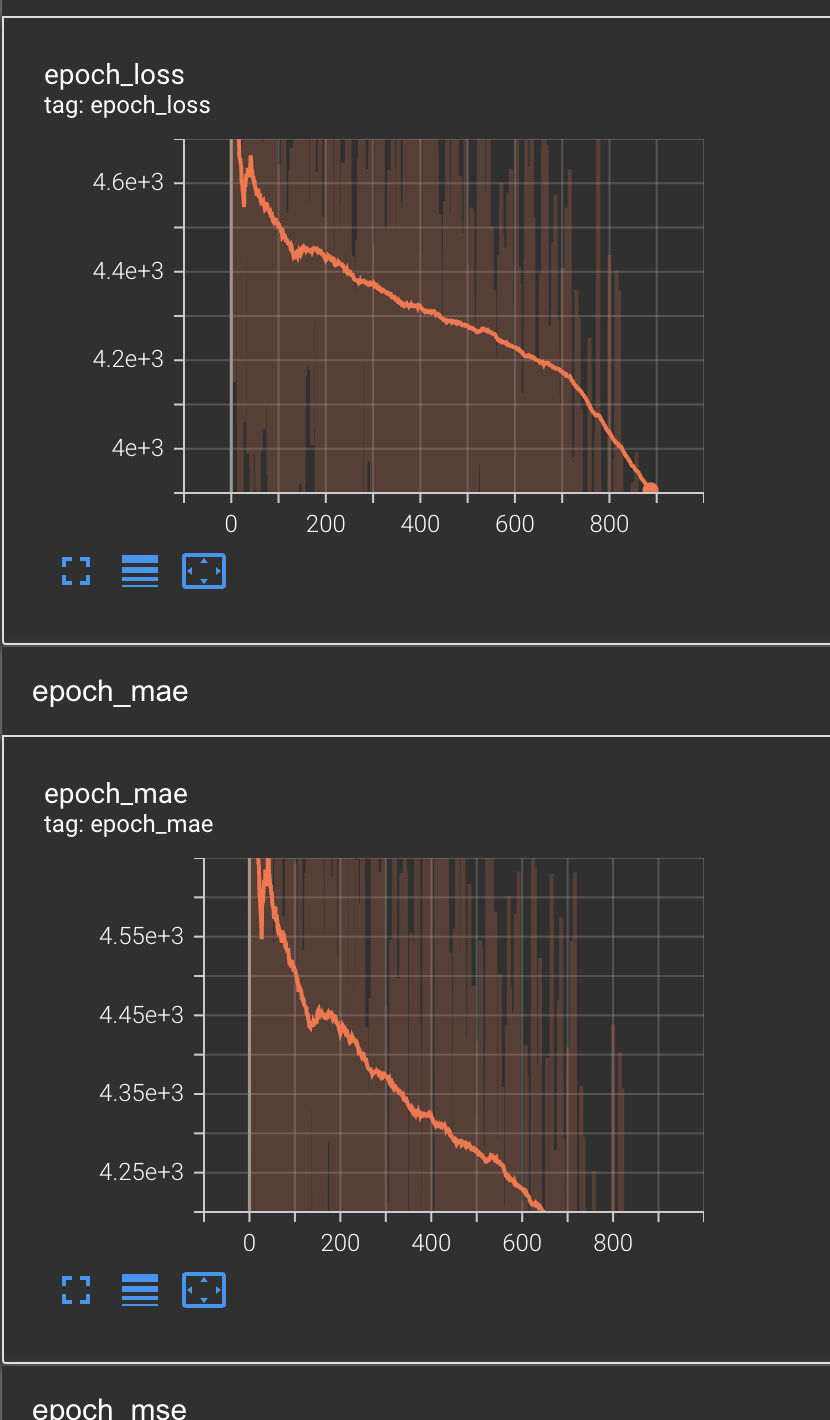

# Testing

In [43]:
testing_generator

NameError: name 'testing_generator' is not defined

In [44]:
for i in range(len(testing_generator)):
    x, y = testing_generator[i]
    print(i,x.shape, y.shape)

NameError: name 'testing_generator' is not defined

In [52]:
y_pred=model1.predict(X_test)

672/672 [==============================] - 1s 743us/step


In [53]:
print(y_pred.max())#.shape
print(y_pred.min())#.shape

713014.3
15870.196


In [54]:
len(y_pred)

21486

In [55]:
len(y_test)#.values.shape
_y_test=np.array(y_test)

In [56]:
y_test.values.max()

795822.0

In [57]:
y_test.values.min()

0.0

In [58]:
#ALL TESTS

In [40]:
# ## utility - save/load the model
# import os
# import joblib

# # to save
# # joblib.dump(rf, path + '/results/random_forest_offset_RUL.joblib') 

# # to load
# rf = joblib.load(data_path + '/random_forest_offset_RUL.joblib')

### Evaluation

In [59]:

print('R^2:', metrics.r2_score(_y_test,y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(_y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(_y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(_y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(_y_test, y_pred))) # np.sqrt

print('Explained Variance Score:', metrics.explained_variance_score(_y_test, y_pred))
print('Max Error:', metrics.max_error(_y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(_y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(_y_test, y_pred))

## with n_estimators = 150

# R^2: 0.9991654290573937 1882843
# Mean Absolute Error (MAE): 1158.6216816072117
# Mean Squared Error (MSE): 333818221.94037396
# Root Mean Squared Error (RMSE): 18270.692979205083
# Explained Variance Score: 0.9991654316522736
# Max Error: 1998236.0866666667
# Mean Squared Log Error: 0.012717975468372306
# Median Absolute Error: 147.4266666667536

## n_estimators = 10
# R^2: 0.9990822069686238
# Mean Absolute Error (MAE): 1213.5715068447246
# Mean Squared Error (MSE): 367106044.79767376
# Mean Absolute Percentage Error (MAPE): 1.0690696275079867e+17
# Root Mean Squared Error (RMSE): 19160.011607451437
# Explained Variance Score: 0.9990822141398445
# Max Error: 1998818.5
# Mean Squared Log Error: 0.012296657672986336
# Median Absolute Error: 137.60000000009313


R^2: -0.5269547274664141
Mean Absolute Error (MAE): 119554.5340733319
Mean Squared Error (MSE): 38262939890.85017
Mean Absolute Percentage Error (MAPE): 1.5278077931276112e+17
Root Mean Squared Error (RMSE): 195609.1508361768
Explained Variance Score: -0.0017534680662203428
Max Error: 779945.9677734375
Mean Squared Log Error: 4.27993963638429
Median Absolute Error: 82324.5732421875


### Show feature importance

In [32]:
# # RF: Get feature list
# ## Learn more: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

# features = list(X_test.columns)  

# rf_imp_features = []

# ## Plot the feature importance
# def plot_feature_importance ():
#     importances = rf.feature_importances_
    
#     indices = np.argsort(importances)[len(importances)-25:] ## top 25    

#     plt.figure(figsize = (12,8))
#     plt.rcParams['font.size'] = 12
    
#     plt.title('Feature Importances')
#     plt.barh(range(len(indices)), importances[indices], color='b', align='center')

#     features_y = []
#     for x in indices:
#         features_y.append(features[x])
        
#     plt.yticks(range(len(indices)), features_y) 

#     plt.xlabel('Relative Importance')
#     plt.savefig(path + '/results/fi_offset_RUL.png') # save

#     plt.show()
#     return features_y

# rf_imp_features = plot_feature_importance()

### Prediction

In [ ]:
# get a random sample to verify the results!
## 
import matplotlib
import matplotlib.pyplot as plt
RNDSEED = np.random.seed(39)

dfs = df.sample(1000, random_state = RNDSEED) # data points
# print(dfs.rul)
X_dfs = dfs.drop('rul',axis = 1) # drop response

ys_pred = rf.predict(X_dfs)
# print(ys_pred)

rul = dfs[['rul']]
rul = rul.rename(columns={'rul': 'original'})
rul['prediction'] = ys_pred
# rul.head(5)

matplotlib.style.use('ggplot') ## styling

rul.plot.scatter(x='original', y='prediction', figsize=(16, 9), c='original', colormap='viridis') ## scatter

plt.savefig(path + '/results/offset_rul_prediction.png') # save


In [ ]:
## Plot the % of deviation 

rul['difference'] = (rul['prediction'] - rul['original']) /  rul['original']

rul.index = range(len(rul.index)) ## reset index

ax = rul.plot( y=["difference"], figsize=(16, 9))

ax.set_xlabel("Index")
ax.set_ylabel("Difference")

plt.show()

# out of couriosity 
print(len(rul[(rul['difference'] > 0.2) | (rul['difference'] < -0.2)])) # how many more than 20%? # 8 only!

In [ ]:
## styles
plt.style.available


# Working LSTM

In [291]:
# multivariate one step problem
from numpy import array
from numpy import hstack
from numpy import insert
from keras.preprocessing.sequence import TimeseriesGenerator
# define dataset
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])
out_seq = array([25, 45, 65, 85, 105, 125, 145, 165, 185, 205])
# reshape series

In [292]:

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2))

In [293]:
pd.DataFrame(dataset)



,0,1
0,10,15
1,20,25
2,30,35
3,40,45
4,50,55
5,60,65
6,70,75
7,80,85
8,90,95
9,100,105


In [294]:
#NOT DIRECTLY GO BACK ONE TIMESTEP !!!!!NOT!!!! BAD WAY
generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=1)

for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[10 15]]] => [[45]]
[[[20 25]]] => [[65]]
[[[30 35]]] => [[85]]
[[[40 45]]] => [[105]]
[[[50 55]]] => [[125]]
[[[60 65]]] => [[145]]
[[[70 75]]] => [[165]]
[[[80 85]]] => [[185]]
[[[90 95]]] => [[205]]


In [295]:

# shift the target sample by one step
out_seq = insert(out_seq, 0, 0)
#pre

out_seq = np.delete(out_seq, -1)
# define generator
n_input = 1
generator = TimeseriesGenerator(dataset, out_seq, length=n_input, batch_size=1)
# print each sample
for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))

[[[10 15]]] => [25]
[[[20 25]]] => [45]
[[[30 35]]] => [65]
[[[40 45]]] => [85]
[[[50 55]]] => [105]
[[[60 65]]] => [125]
[[[70 75]]] => [145]
[[[80 85]]] => [165]
[[[90 95]]] => [185]


In [296]:
# define generator
n_features = dataset.shape[1]
n_input = SEQUENCE_LENGHT
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=8)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=1)


Epoch 1/500


/tmp/ipykernel_413302/1060287710.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=1)
2023-05-03 13:28:14.868586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 1s/step - loss: 4717.5898
Epoch 2/500
1/1 [==============================] - 0s 16ms/step - loss: 4642.8096
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 4569.4141
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 4497.0552
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 4424.9897
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 4353.1387
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 4280.8086
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 4207.4229
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 4132.2603
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 4055.1626
Epoch 11/500
1/1 [==============================] - 0s 15ms/step - loss: 3975.5200
Epoch 12/500
1/1 [==============================] - 0s 14ms/step - loss: 3892.7153
Epoch 13/500
1/1 [=========

1/1 [==============================] - 0s 16ms/step - loss: 6.3450
Epoch 203/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3416
Epoch 204/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3385
Epoch 205/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3355
Epoch 206/500
1/1 [==============================] - 0s 14ms/step - loss: 6.3328
Epoch 207/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3303
Epoch 208/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3278
Epoch 209/500
1/1 [==============================] - 0s 17ms/step - loss: 6.3252
Epoch 210/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3225
Epoch 211/500
1/1 [==============================] - 0s 14ms/step - loss: 6.3196
Epoch 212/500
1/1 [==============================] - 0s 15ms/step - loss: 6.3171
Epoch 213/500
1/1 [==============================] - 0s 14ms/step - loss: 6.3149
Epoch 214/500
1/1 [=======================

1/1 [==============================] - 0s 15ms/step - loss: 6.2548
Epoch 405/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2547
Epoch 406/500
1/1 [==============================] - 0s 14ms/step - loss: 6.2547
Epoch 407/500
1/1 [==============================] - 0s 14ms/step - loss: 6.2546
Epoch 408/500
1/1 [==============================] - 0s 14ms/step - loss: 6.2546
Epoch 409/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 410/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 411/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 412/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 413/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2546
Epoch 414/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2545
Epoch 415/500
1/1 [==============================] - 0s 15ms/step - loss: 6.2545
Epoch 416/500
1/1 [=======================

In [298]:
# make a one step prediction out of sample
x_input = array([[90, 95], [100, 105]]).reshape((1, n_input, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 0s 18ms/step
[[112.921326]]
